## Data Load and Exploration

In [1]:
import pandas as pd

dataset = pd.read_csv("data/dataset.csv", encoding="utf-8")

dataset.head()

,Date_published,Headline,Synopsis,Full_text,Final Status
0,2022-06-21,"Banks holding on to subsidy share, say payment...",The companies have written to the National Pay...,ReutersPayments companies and banks are at log...,Negative
1,2022-04-19,Digitally ready Bank of Baroda aims to click o...,"At present, 50% of the bank's retail loans are...",AgenciesThe bank presently has 20 million acti...,Positive
2,2022-05-27,Karnataka attracted investment commitment of R...,Karnataka is at the forefront in attracting in...,PTIKarnataka Chief Minister Basavaraj Bommai.K...,Positive
3,2022-04-06,Splitting of provident fund accounts may be de...,The EPFO is likely to split accounts only at t...,Getty ImagesThe budget for FY22 had imposed in...,Negative
4,2022-06-14,Irdai weighs proposal to privatise Insurance I...,"Set up in 2009 as an advisory body, IIB collec...",AgenciesThere is a view in the insurance indus...,Positive


Final Status
Positive     215
Negative     184
Positive       1
Name: count, dtype: int64
Final Status
Positive     0.5375
Negative     0.4600
Positive     0.0025
Name: proportion, dtype: float64


<Axes: xlabel='Final Status'>

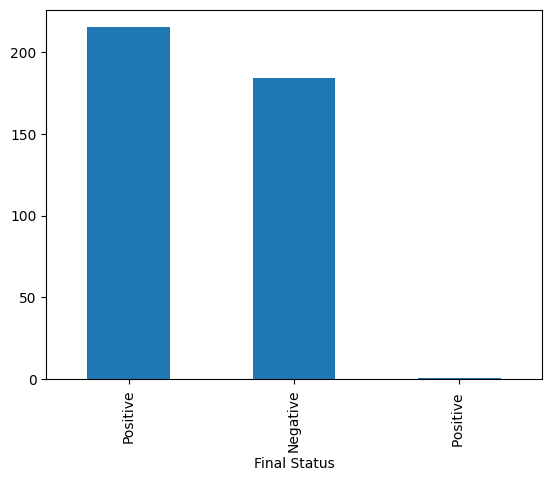

In [2]:
print(dataset["Final Status"].value_counts())

print(dataset["Final Status"].value_counts(normalize=True))

dataset["Final Status"].value_counts().plot(kind="bar")

## Data Cleaning

On line 97 of the original dataset CSV file, a space was found after the class label, originating in a new erroneous class.

In [3]:
dataset.iloc[97]["Final Status"]

'Positive '

In [4]:
dataset.iloc[97]["Final Status"] = 'Positive'
dataset.iloc[97]["Final Status"]

'Positive'

Final Status
Positive    216
Negative    184
Name: count, dtype: int64
Final Status
Positive    0.54
Negative    0.46
Name: proportion, dtype: float64


<Axes: xlabel='Final Status'>

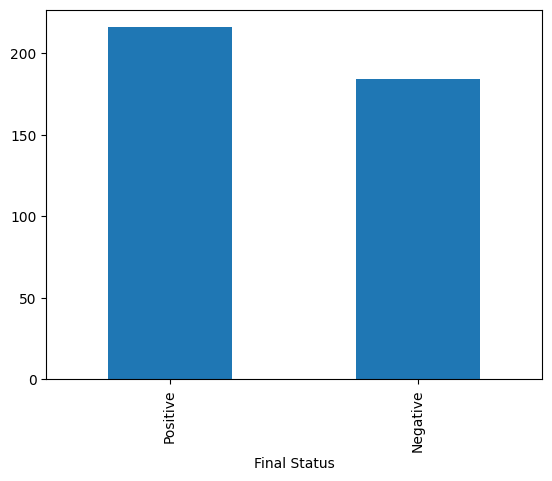

In [5]:
print(dataset["Final Status"].value_counts())

print(dataset["Final Status"].value_counts(normalize=True))

dataset["Final Status"].value_counts().plot(kind="bar")

In [6]:
# Convert to binary
dataset["Final Status"] = dataset["Final Status"].map({"Positive": 1, "Negative": 0})

In [7]:
print("Missing Values:\n", dataset.isnull().sum())

Missing Values:
 Date_published    0
Headline          0
Synopsis          1
Full_text         0
Final Status      0
dtype: int64


## Preprocessing Text

In [8]:
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [9]:
negative_words = {
    "no",
    "not",
    "none",
    "neither",
    "never",
    "nobody",
    "nothing",
    "nowhere",
    "doesn't",
    "isn't",
    "wasn't",
    "shouldn't",
    "won't",
    "can't",
    "couldn't",
    "don't",
    "haven't",
    "hasn't",
    "hadn't",
    "aren't",
    "weren't",
    "wouldn't",
    "daren't",
    "needn't",
    "didn't",
    "without",
    "against",
    "negative",
    "deny",
    "reject",
    "refuse",
    "decline",
    "unhappy",
    "sad",
    "miserable",
    "hopeless",
    "worthless",
    "useless",
    "futile",
    "disagree",
    "oppose",
    "contrary",
    "contradict",
    "disapprove",
    "dissatisfied",
    "objection",
    "unsatisfactory",
    "unpleasant",
    "regret",
    "resent",
    "lament",
    "mourn",
    "grieve",
    "bemoan",
    "despise",
    "loathe",
    "detract",
    "abhor",
    "dread",
    "fear",
    "worry",
    "anxiety",
    "sorrow",
    "gloom",
    "melancholy",
    "dismay",
    "disheartened",
    "despair",
    "dislike",
    "aversion",
    "antipathy",
    "hate",
    "disdain",
}
sw = set(stopwords.words("english"))
stop_words = sw - negative_words

In [10]:
def preprocess_text(text):
    text = re.sub("[^a-zA-Z]", " ", str(text))  # alpha only
    # text = re.sub("[^a-zA-Z0-9]", " ", str(text))  # also numbers
    # text = re.sub("[^a-zA-Z0-9%]", " ", str(text))  # also numbers and %
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [ps.stem(token) for token in tokens]
    #tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

In [11]:
corpus = []
dataset["processed_article"] = (
    dataset["Headline"] + " " + dataset["Synopsis"] + " " + dataset["Full_text"]
)

for i in range(len(dataset["processed_article"])):
    dataset.loc[i,"processed_article"] = preprocess_text(dataset["processed_article"][i])
    corpus.append(dataset["processed_article"][i])

In [12]:
corpus

['bank hold subsidi share say payment firm compani written nation payment corp india npci complain crore crore grant budget retain bank reuterspay compani bank loggerhead share govern grant subsidi build payment infrastructur said three peopl knowledg matter compani written nation payment corp india npci complain crore crore grant budget retain bank said depriv compani connect last mile state promis revenu accord govern grant subsidi exchang waiv merchant discount rate mdr charg govern releas crore worth subsidi bank not share payment aggreg said ceo payment compani condit anonym compens mdr waiver taken matter npci nodal agenc feedback got take matter respect bank not respond last year financ minist nirmala sitharaman announc rs crore fund hasten expans india digit payment industri move seen compens waiver mdr use unifi payment interfac upi rupay card previou budget payment aggreg entitl receiv basi point subvent small valu digit transact basi point percentag point ask bank process tr

In [13]:
vocab = set()

for s in corpus:
    vocab.update(s.split())

vocab_size = len(vocab)
print(vocab_size,vocab)

6365 {'vide', 'combin', 'rationaleangelon', 'reorganis', 'prospect', 'away', 'deterior', 'write', 'marketplac', 'joy', 'cyberspac', 'multifold', 'section', 'bhamr', 'ytd', 'much', 'stoxx', 'dhoni', 'pankajbhai', 'third', 'ember', 'articul', 'virtual', 'laden', 'agenciesr', 'upon', 'lament', 'nearli', 'biscuit', 'wobbl', 'compalm', 'compris', 'comercia', 'experi', 'rover', 'belaru', 'chemic', 'lest', 'thumb', 'mayt', 'spike', 'abet', 'troop', 'african', 'agenciesrelatedadani', 'kotak', 'bond', 'lid', 'slightest', 'todayonli', 'sync', 'queri', 'pick', 'cfo', 'lkp', 'walt', 'seamless', 'viral', 'jewelleri', 'compel', 'petition', 'h', 'buyfrom', 'defin', 'els', 'restock', 'exchang', 'sometim', 'shut', 'templat', 'commonwealth', 'judg', 'gain', 'feel', 'earth', 'four', 'godfrey', 'jhunjhunwalanew', 'industriel', 'peac', 'pointer', 'exacerb', 'nove', 'sight', 'wire', 'surround', 'shot', 'cfp', 'convincingli', 'nsebseunivers', 'district', 'sideway', 'enough', 'indust', 'patspin', 'soumitra', 

#### Wordclouds

A visually appealing way of observing words in a corpus is by showing wordclouds. In order to make a single wordcloud for the whole corpus, we can join all reviews together. We then pass it to [WordCloud](https://amueller.github.io/word_cloud/) to generate a wordcloud: it will automatically assign weights to words based on the number of occurrences of each word.

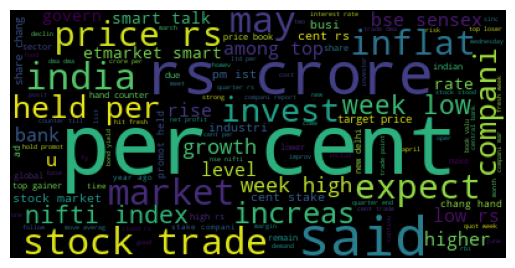

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(" ".join(corpus))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

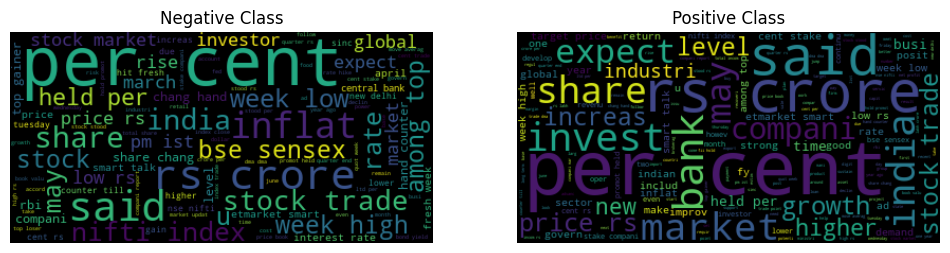

In [15]:
corpus_0 = []
corpus_1 = []

for i in range(0, dataset["processed_article"].size):
    article = dataset["processed_article"][i]
    label = dataset["Final Status"][i]
    if label == 0:
        corpus_0.append(article)
    else:
        corpus_1.append(article)

wordcloud_0 = WordCloud().generate(" ".join(corpus_0))
wordcloud_1 = WordCloud().generate(" ".join(corpus_1))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_0, interpolation="bilinear")
axes[0].set_title("Negative Class")
axes[0].axis("off")
axes[1].imshow(wordcloud_1, interpolation="bilinear")
axes[1].set_title("Positive Class")
axes[1].axis("off")
plt.show()

## Vector Representation

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer()
#vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(corpus).toarray()

print(X.shape)

(400, 113240)


In [17]:
print(vectorizer.get_feature_names_out())

['aa' 'aa plu' 'aa plu tradelink' ... 'zydu well nestl' 'zydu well parag'
 'zydu well tasti']


In [18]:
y = dataset['Final Status']

print(X.shape, y.shape)

(400, 113240) (400,)


## Train-Test Split

In [19]:
from sklearn.model_selection import (
    train_test_split,
    ParameterGrid,
    GridSearchCV,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("\nLabel distribution in the training set:")
print(y_train.value_counts())

print("\nLabel distribution in the test set:")
print(y_test.value_counts())

(320, 113240) (320,)
(80, 113240) (80,)

Label distribution in the training set:
Final Status
1    176
0    144
Name: count, dtype: int64

Label distribution in the test set:
Final Status
0    40
1    40
Name: count, dtype: int64


## Modeling (and Tuning) Classifiers

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [21]:
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Multi-Layer Perceptron": MLPClassifier(),
    "XGBoost": XGBClassifier(),
}

In [22]:
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [23]:
# Tuning classifiers
# TODO: implement in pipeline

# classifier = RandomForestClassifier()

# param_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_depth": [None, 10, 20],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
# }

# grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
# grid_search.fit(X_train, y_train)

# y_pred = grid_search.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Classifier Accuracy:", accuracy)

# print("Best Parameters:", grid_search.best_params_)
# clf_best_params = grid_search.best_params_

## Evaluation

In [24]:
evaluations = {
    classifier_name: evaluate_classifier(classifier, X_train, y_train, X_test, y_test)
    for classifier_name, classifier in classifiers.items()
}

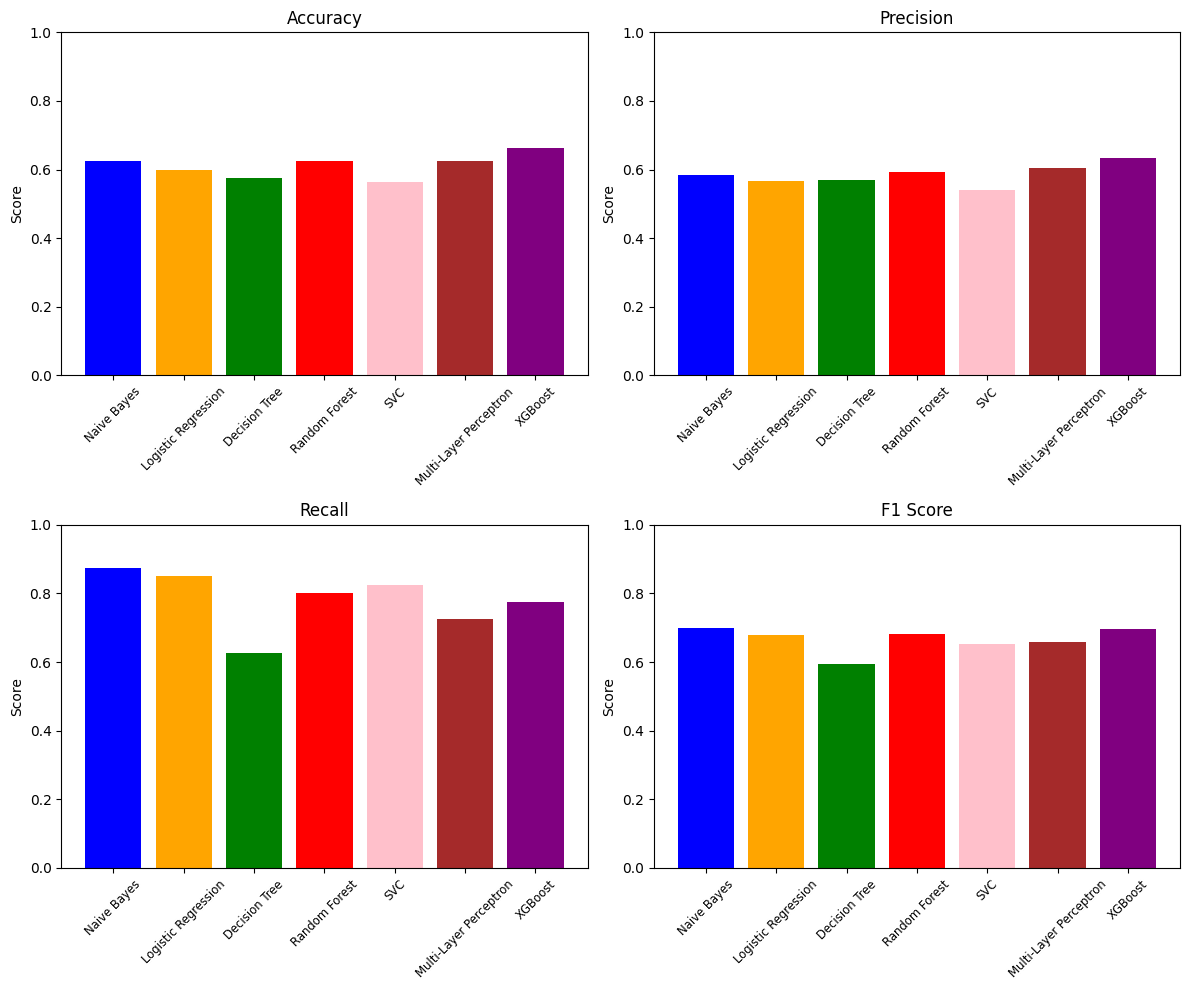

Classifier: Naive Bayes
Accuracy: 0.62
Precision: 0.58
Recall: 0.88
F1 Score: 0.70
------------------------------
Classifier: Logistic Regression
Accuracy: 0.60
Precision: 0.57
Recall: 0.85
F1 Score: 0.68
------------------------------
Classifier: Decision Tree
Accuracy: 0.57
Precision: 0.57
Recall: 0.62
F1 Score: 0.60
------------------------------
Classifier: Random Forest
Accuracy: 0.62
Precision: 0.59
Recall: 0.80
F1 Score: 0.68
------------------------------
Classifier: SVC
Accuracy: 0.56
Precision: 0.54
Recall: 0.82
F1 Score: 0.65
------------------------------
Classifier: Multi-Layer Perceptron
Accuracy: 0.62
Precision: 0.60
Recall: 0.72
F1 Score: 0.66
------------------------------
Classifier: XGBoost
Accuracy: 0.66
Precision: 0.63
Recall: 0.78
F1 Score: 0.70
------------------------------


In [25]:
metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

colors = ["blue", "orange", "green", "red", "pink", "brown", "purple"]

for i, metric in enumerate(metrics_names):
    row = i // 2
    col = i % 2
    scores = [evaluation[i] for evaluation in evaluations.values()]
    axs[row, col].bar(classifiers.keys(), scores, color=colors)
    axs[row, col].set_title(metric)
    axs[row, col].set_ylabel("Score")
    axs[row, col].set_ylim([0, 1])
    axs[row, col].tick_params(axis="x", labelrotation=45, labelsize="small")

plt.tight_layout()
plt.show()

for classifier_name, metrics in evaluations.items():
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {metrics[0]:.2f}")
    print(f"Precision: {metrics[1]:.2f}")
    print(f"Recall: {metrics[2]:.2f}")
    print(f"F1 Score: {metrics[3]:.2f}")
    print("-" * 30)

## Cross-validation

In [26]:
# TODO: implement in pipeline

# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score

# clf = SVC()
# scores = cross_val_score(clf, X, y, cv=10)

# print(scores)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

## VADER Sentiment

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
y_pred = []
for article in dataset['processed_article']:
    y_pred.append(1 if analyzer.polarity_scores(article)['compound'] > 0 else 0)

In [29]:
print('Accuracy: ', accuracy_score(y, y_pred))
print('Precision: ', precision_score(y, y_pred))
print('Recall: ', recall_score(y, y_pred))
print('F1: ', f1_score(y, y_pred))

Accuracy:  0.5875
Precision:  0.5694822888283378
Recall:  0.9675925925925926
F1:  0.7169811320754715
